In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Posicionamento de ED e GW

- Posicionamento em x, y, z
- Representação de SF de cada ED por meio de cores

In [2]:
network_df = pd.read_csv("network_results.csv") 

print("Trows:", len(network_df))
network_df.head(5)

Trows: 50


,ed_id,ed_x,ed_y,ed_z,sf,gw_id,gw_x,gw_y,gw_z,distance
0,0.0,-175.7520,381.418,1.0,7.0,50.0,0.0,0.0,50.0,422.811
1,1.0,307.3610,284.960,1.0,7.0,50.0,0.0,0.0,50.0,421.988
2,2.0,58.8699,353.876,1.0,7.0,50.0,0.0,0.0,50.0,362.070
3,3.0,392.7490,-109.967,1.0,7.0,50.0,0.0,0.0,50.0,410.787
4,4.0,-155.9130,-178.340,1.0,7.0,50.0,0.0,0.0,50.0,241.899


In [3]:
# listas de EDS por SF
eds_x_sf7 = []
eds_y_sf7 = []

eds_x_sf8 = []
eds_y_sf8 = []

eds_x_sf9 = []
eds_y_sf9 = []

eds_x_sf10 = []
eds_y_sf10 = []

eds_x_sf11 = []
eds_y_sf11 = []

eds_x_sf12 = []
eds_y_sf12 = []

for i in range (len(network_df)):
    
    if network_df.iloc[i].sf == 7.0:
        eds_x_sf7.append(network_df.iloc[i].ed_x)
        eds_y_sf7.append(network_df.iloc[i].ed_y)
    if network_df.iloc[i].sf == 8.0:
        eds_x_sf8.append(network_df.iloc[i].ed_x)
        eds_y_sf8.append(network_df.iloc[i].ed_y)
    if network_df.iloc[i].sf == 9.0:
        eds_x_sf9.append(network_df.iloc[i].ed_x)
        eds_y_sf9.append(network_df.iloc[i].ed_y)
    if network_df.iloc[i].sf == 10.0:
        eds_x_sf10.append(network_df.iloc[i].ed_x)
        eds_y_sf10.append(network_df.iloc[i].ed_y)
    if network_df.iloc[i].sf == 11.0:
        eds_x_sf11.append(network_df.iloc[i].ed_x)
        eds_y_sf11.append(network_df.iloc[i].ed_y)
    if network_df.iloc[i].sf == 12.0:
        eds_x_sf12.append(network_df.iloc[i].ed_x)
        eds_y_sf12.append(network_df.iloc[i].ed_y)

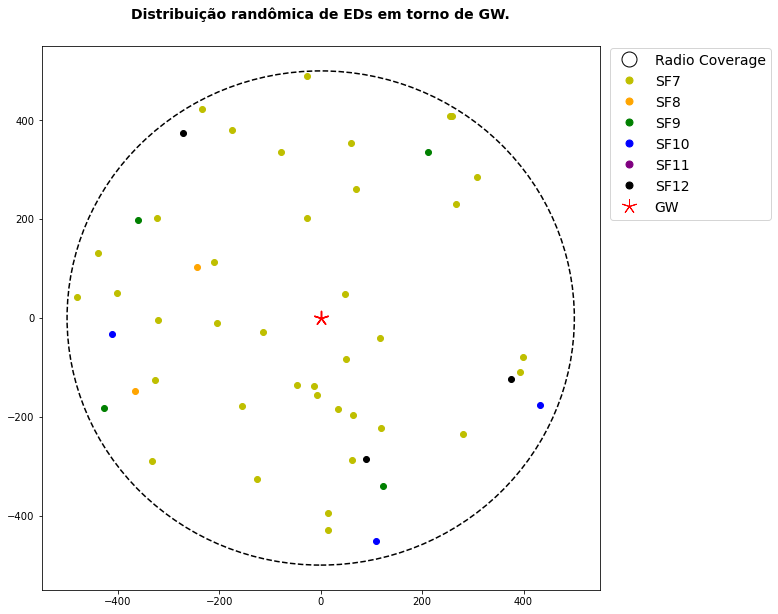

In [4]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

#fig, ax = plt.subplots()
# graph measures x time
fig = plt.figure(figsize=(10,10))
ax = plt.gca()


ax.set(xlim=(-550, 550), ylim = (-550, 550))


a_circle = plt.Circle((0, 0), 500, fill= False, linestyle = '--', linewidth = 1.5, label='Radio Coverage')
ax.add_artist(a_circle)


# draw ED posxy per SF 
ax.scatter(eds_x_sf7, eds_y_sf7, color='y', label ='SF7')
ax.scatter(eds_x_sf8, eds_y_sf8, color='orange', label ='SF8')
ax.scatter(eds_x_sf9, eds_y_sf9, color='green', label ='SF9')
ax.scatter(eds_x_sf10, eds_y_sf10, color='blue', label ='SF10')
ax.scatter(eds_x_sf11, eds_y_sf11, color='purple', label ='SF11')
ax.scatter(eds_x_sf12, eds_y_sf12, color='black', label ='SF10')


# draw GW
ax.scatter(network_df.iloc[i].gw_x, network_df.iloc[i].gw_y, color='red', label ='GW', marker = (5,2), s = 200)
        

# legend settings per plot
legend_lines = []

circle_lgd_line = mlines.Line2D([], [],
                          color = 'white',
                          marker = 'o',
                          markeredgecolor = 'black',
                          markeredgewidth = 1,
                          markerfacecolor = 'white',
                          markersize = 15,
                          label='Radio Coverage')

legend_lines.append(circle_lgd_line)

colors = ['y','orange', 'green', 'blue', 'purple', 'black']
for sf in range(len(colors)):
    
    scatter_lgd_lines = mlines.Line2D([], [],
                              color = 'white',
                              marker = 'o',
                              markeredgecolor = colors[sf],
                              markeredgewidth = 1,
                              markerfacecolor = colors[sf],
                              markersize = 7, 
                              label = 'SF' + str(sf + 7))
    legend_lines.append(scatter_lgd_lines)

scatter_lgd_lines = mlines.Line2D([], [],
                              color = 'white',
                              marker = (5,2),
                              markeredgecolor = 'red',
                              markeredgewidth = 1,
                              markerfacecolor = 'red',
                              markersize = 15, 
                              label = 'GW')

legend_lines.append(scatter_lgd_lines)
                                    

ax.legend(handles=[line for line in legend_lines], loc="upper right", bbox_to_anchor=(1.32, 1.01), prop={'size': 14})



# ajust x axis datetime

ttl = ax.title
ttl.set_position([.5, 1.04])
plt.title('Distribuição randômica de EDs em torno de GW.',fontweight='bold',fontsize=14)
plt.show()
# fig.savefig('dist_rand_ed_gw.png',bbox_inches='tight')

# Posicionamento de ED, GW e prédios

- Posicionamento em x, y, z de ED e GW
- Posicionamento xMin, yMin, xMax e yMax
- Representação 2D e ED, GW e prédios
- Representação 3D e ED, GW e prédios

In [5]:
buindings_df = pd.read_csv("buildings_dimensions.csv") 
print("Trows:", len(buindings_df))
buindings_df.head(5)

Trows: 72


,building_id,boundaries_xMin,boundaries_yMin,boundaries_xMax,boundaries_yMax
0,1.0,-470.0,-477.5,-340.0,-413.5
1,2.0,-308.0,-477.5,-178.0,-413.5
2,3.0,-146.0,-477.5,-16.0,-413.5
3,4.0,16.0,-477.5,146.0,-413.5
4,5.0,178.0,-477.5,308.0,-413.5


In [6]:
buindings_df.iloc[41]

building_id         42.0
boundaries_xMin    340.0
boundaries_yMin      8.5
boundaries_xMax    470.0
boundaries_yMax     72.5
Name: 41, dtype: float64

Total de prédios: 72
Cenário a: 18
Cenário b: 18
Cenário c: 18
Cenário d: 18
Total =  72


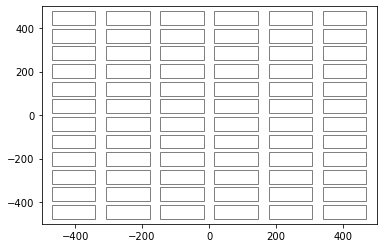

In [7]:
# Rectangle(xy, width, height, angle=0.0, **kwargs)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html

# Create figure and axes
fig, ax = plt.subplots()

cenario_a = 0 # +x, +y, +w, +h
cenario_b = 0 # +x, -y, +w, -h
cenario_c = 0 # -x, +y, -w, +h
cenario_d = 0 # -x, -y, -w, -h

# Create a Rectangle patch
# Rectangle(xy, width, height, angle=0.0, **kwargs) == (xMinYmin, xMax, yMax)
for i in range (len(buindings_df)):
# for i in range (40, 72):
    
    # cenario a (+x, +y, +w, +h)
    if buindings_df.iloc[i].boundaries_xMin >= 0 and buindings_df.iloc[i].boundaries_yMin >= 0 and buindings_df.iloc[i].boundaries_xMax >= 0 and  buindings_df.iloc[i].boundaries_yMax >= 0:
        cenario_a = cenario_a + 1;
        rect = patches.Rectangle(
            (buindings_df.iloc[i].boundaries_xMin, buindings_df.iloc[i].boundaries_yMin),
            buindings_df.iloc[i].boundaries_xMax - buindings_df.iloc[i].boundaries_xMin,
            buindings_df.iloc[i].boundaries_yMax - buindings_df.iloc[i].boundaries_yMin,
            linewidth = 1,
            edgecolor='gray',
            facecolor='none'
        )

        # Add the patch to the Axes
        ax.add_patch(rect)
        
    # cenario b (+x, -y, +w, -h)
    elif buindings_df.iloc[i].boundaries_xMin >= 0 and buindings_df.iloc[i].boundaries_yMin < 0 and buindings_df.iloc[i].boundaries_xMax >= 0 and  buindings_df.iloc[i].boundaries_yMax < 0:
        cenario_b = cenario_b + 1;
        rect = patches.Rectangle(
            (buindings_df.iloc[i].boundaries_xMin, buindings_df.iloc[i].boundaries_yMin),
            buindings_df.iloc[i].boundaries_xMax - buindings_df.iloc[i].boundaries_xMin,
            buindings_df.iloc[i].boundaries_yMax - buindings_df.iloc[i].boundaries_yMin,
            linewidth = 1,
            edgecolor='gray',
            facecolor='none'
        )
        ax.add_patch(rect)

    # cenario c (-x, +y, -w, +h)
    elif buindings_df.iloc[i].boundaries_xMin < 0 and buindings_df.iloc[i].boundaries_yMin >= 0 and buindings_df.iloc[i].boundaries_xMax < 0 and  buindings_df.iloc[i].boundaries_yMax >= 0:
        cenario_c = cenario_c + 1;
        rect = patches.Rectangle(
            (buindings_df.iloc[i].boundaries_xMin, buindings_df.iloc[i].boundaries_yMin),
            buindings_df.iloc[i].boundaries_xMax - buindings_df.iloc[i].boundaries_xMin,
            buindings_df.iloc[i].boundaries_yMax - buindings_df.iloc[i].boundaries_yMin,
            linewidth = 1,
            edgecolor='gray',
            facecolor='none'
        )
        ax.add_patch(rect)
    
    # cenario c (-x, -y, -w, -h)
    elif buindings_df.iloc[i].boundaries_xMin < 0 and buindings_df.iloc[i].boundaries_yMin < 0 and buindings_df.iloc[i].boundaries_xMax < 0 and  buindings_df.iloc[i].boundaries_yMax < 0:
        cenario_d = cenario_d + 1;
        rect = patches.Rectangle(
            (buindings_df.iloc[i].boundaries_xMin, buindings_df.iloc[i].boundaries_yMin),
            buindings_df.iloc[i].boundaries_xMax - buindings_df.iloc[i].boundaries_xMin,
            buindings_df.iloc[i].boundaries_yMax - buindings_df.iloc[i].boundaries_yMin,
            linewidth = 1,
            edgecolor='gray',
            facecolor='none'
        )
        ax.add_patch(rect)
        
        
print("Total de prédios:",len(buindings_df))
print("Cenário a:", cenario_a)
print("Cenário b:", cenario_b)
print("Cenário c:", cenario_c)
print("Cenário d:", cenario_d)
print("Total = ", cenario_a + cenario_b + cenario_c + cenario_d)

# set axis limits
ax.set_ylim([-500, 500]) 
ax.set_xlim([-500, 500]) 

plt.show()

IndexError: single positional indexer is out-of-bounds

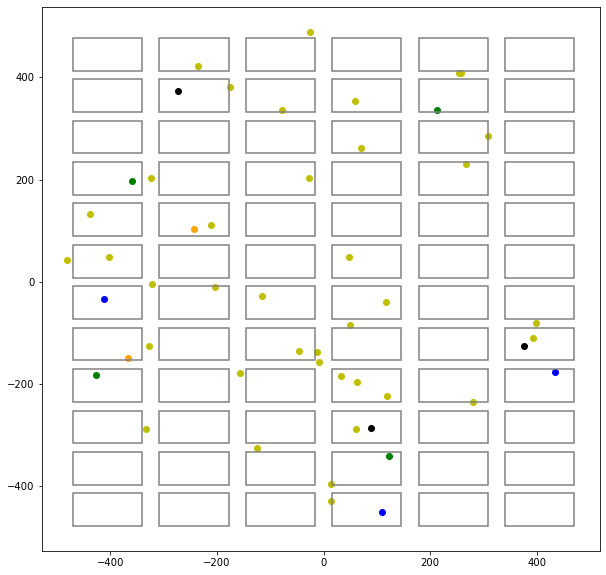

In [8]:
# Create figure and axes
# fig, ax = plt.subplots()

fig = plt.figure(figsize=(10,10))
ax = plt.gca()


# Create a Rectangle patch
# Rectangle(xy, width, height, angle=0.0, **kwargs) == (xMinYmin, xMax, yMax)
for i in range (len(buindings_df)):
    
    rect = patches.Rectangle(
        (buindings_df.iloc[i].boundaries_xMin, buindings_df.iloc[i].boundaries_yMin),
        buindings_df.iloc[i].boundaries_xMax - buindings_df.iloc[i].boundaries_xMin,
        buindings_df.iloc[i].boundaries_yMax - buindings_df.iloc[i].boundaries_yMin,
        linewidth = 1.5,
        edgecolor='gray',
        facecolor='none',
        label="Building"
    )

    # Add the patch to the Axes
    ax.add_patch(rect)



# draw ED posxy per SF 
ax.scatter(eds_x_sf7, eds_y_sf7, color='y', label ='SF7')
ax.scatter(eds_x_sf8, eds_y_sf8, color='orange', label ='SF8')
ax.scatter(eds_x_sf9, eds_y_sf9, color='green', label ='SF9')
ax.scatter(eds_x_sf10, eds_y_sf10, color='blue', label ='SF10')
ax.scatter(eds_x_sf11, eds_y_sf11, color='purple', label ='SF11')
ax.scatter(eds_x_sf12, eds_y_sf12, color='black', label ='SF10')


# draw GW
ax.scatter(network_df.iloc[i].gw_x, network_df.iloc[i].gw_y, color='red', label ='GW', marker = (5,2), s = 200)

# set axis limits
ax.set_ylim([-500, 500]) 
ax.set_xlim([-500, 500]) 


# legend settings per plot
legend_lines = []
legend_lines.append(rect)

colors = ['y','orange', 'green', 'blue', 'purple', 'black']
for sf in range(len(colors)):
    
    scatter_lgd_lines = mlines.Line2D([], [],
                              color = 'white',
                              marker = 'o',
                              markeredgecolor = colors[sf],
                              markeredgewidth = 1,
                              markerfacecolor = colors[sf],
                              markersize = 7, 
                              label = 'SF' + str(sf + 7))
    legend_lines.append(scatter_lgd_lines)
                                    

scatter_lgd_lines = mlines.Line2D([], [],
                              color = 'white',
                              marker = (5,2),
                              markeredgecolor = 'red',
                              markeredgewidth = 1,
                              markerfacecolor = 'red',
                              markersize = 15, 
                              label = 'GW')

legend_lines.append(scatter_lgd_lines)
                                    
ax.legend(handles=[line for line in legend_lines], loc="upper right", bbox_to_anchor=(1.23, 1.01), prop={'size': 14})


ttl = ax.title
ttl.set_position([.5, 1.04])
plt.title('Distribuição randômica de EDs em torno de GW em cenário com prédios de 130 x 64 m.',fontweight='bold',fontsize=14)

plt.show()
# fig.savefig('dist_rand_ed_gw_building.png',bbox_inches='tight')

In [ ]:
# Three-Dimensional Plotting in Matplotlib
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html


fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

num_bars = len(buindings_df)

x_pos = [ buindings_df.iloc[i].boundaries_xMin for i in range (len(buindings_df)) ]
y_pos = [ buindings_df.iloc[i].boundaries_yMin for i in range (len(buindings_df)) ]


x_size = [ (buindings_df.iloc[i].boundaries_xMax - buindings_df.iloc[i].boundaries_xMin) for i in range (len(buindings_df))]
y_size = [ (buindings_df.iloc[i].boundaries_yMax - buindings_df.iloc[i].boundaries_yMin) for i in range (len(buindings_df))]

z_pos = [0] * num_bars
z_size = 6

# print("x_pos:", x_pos, "\n")
# print("y_pos:", y_pos, "\n")
# print("z_pos:", z_pos, "\n")

# print("x_size:", x_size, "\n")
# print("y_size:", y_size, "\n")
# print("z_size:", z_size, "\n")



# draw buildings
ax.bar3d(x_pos, y_pos, z_pos, x_size, y_size, z_size, color='gray')


# draw ED

ed_z = 1
colors = ['y','orange', 'green', 'blue', 'purple', 'black']
for i in range (7, 7+ len(colors)):
    if i == 7:
        for x,y in zip(eds_x_sf7, eds_y_sf7):
            ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);
    elif i == 8:
        for x,y in zip(eds_x_sf8, eds_y_sf8):
            ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);
    elif i == 9:
        for x,y in zip(eds_x_sf9, eds_y_sf9):
            ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);
    elif i == 10:
        for x,y in zip(eds_x_sf10, eds_y_sf10):
            ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);
    elif i == 11:
        for x,y in zip(eds_x_sf11, eds_y_sf11):
            ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);
    elif i == 12:
        for x,y in zip(eds_x_sf12, eds_y_sf12):
            ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);


# draw GW

ax.scatter3D(0, 0, 15,  color='red');

legend_lines = []

# legend settings per plot
legend_lines.append(rect)          

    
scatter_lgd_lines = mlines.Line2D([], [],
                              color = 'white',
                              marker = (5,2),
                              markeredgecolor = 'red',
                              markeredgewidth = 1,
                              markerfacecolor = 'red',
                              markersize = 15, 
                              label = 'GW')

legend_lines.append(scatter_lgd_lines)
                                    
ax.legend(handles=[line for line in legend_lines], loc="upper right", bbox_to_anchor=(1.08, 0.8), prop={'size': 14})




ax.view_init(30, 15)
# ax.view_init(90, 20)


ttl = ax.title
ttl.set_position([.5, 1.04])
plt.title('Representação 3D de posicionamento dos prédios e GW.',fontweight='bold',fontsize=14)
plt.show()

# fig.savefig('rep_3D_predios_gw.png',bbox_inches='tight')

In [ ]:
# Three-Dimensional Plotting in Matplotlib
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html


fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

num_bars = len(buindings_df)

x_pos = [ buindings_df.iloc[i].boundaries_xMin for i in range (len(buindings_df)) ]
y_pos = [ buindings_df.iloc[i].boundaries_yMin for i in range (len(buindings_df)) ]


x_size = [ (buindings_df.iloc[i].boundaries_xMax - buindings_df.iloc[i].boundaries_xMin) for i in range (len(buindings_df))]
y_size = [ (buindings_df.iloc[i].boundaries_yMax - buindings_df.iloc[i].boundaries_yMin) for i in range (len(buindings_df))]

z_pos = [0] * num_bars
z_size = 6

# print("x_pos:", x_pos, "\n")
# print("y_pos:", y_pos, "\n")
# print("z_pos:", z_pos, "\n")

# print("x_size:", x_size, "\n")
# print("y_size:", y_size, "\n")
# print("z_size:", z_size, "\n")



# draw buildings
ax.bar3d(x_pos, y_pos, z_pos, x_size, y_size, z_size, color='gray')


# draw ED

ed_z = 1
colors = ['y','orange', 'green', 'blue', 'purple', 'black']
for i in range (7, 7+ len(colors)):
    if i == 7:
        for x,y in zip(eds_x_sf7, eds_y_sf7):
            ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);
    elif i == 8:
        for x,y in zip(eds_x_sf8, eds_y_sf8):
            ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);
    elif i == 9:
        for x,y in zip(eds_x_sf9, eds_y_sf9):
            ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);
    elif i == 10:
        for x,y in zip(eds_x_sf10, eds_y_sf10):
            ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);
    elif i == 11:
        for x,y in zip(eds_x_sf11, eds_y_sf11):
            ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);
    elif i == 12:
        for x,y in zip(eds_x_sf12, eds_y_sf12):
            ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);


# draw GW

ax.scatter3D(0, 0, 15,  color='red');

legend_lines = []

# legend settings per plot
legend_lines.append(rect)          
for sf in range(len(colors)):
    
    scatter_lgd_lines = mlines.Line2D([], [],
                              color = 'white',
                              marker = 'o',
                              markeredgecolor = colors[sf],
                              markeredgewidth = 1,
                              markerfacecolor = colors[sf],
                              markersize = 7, 
                              label = 'SF' + str(sf + 7))
    legend_lines.append(scatter_lgd_lines)
    
scatter_lgd_lines = mlines.Line2D([], [],
                              color = 'white',
                              marker = (5,2),
                              markeredgecolor = 'red',
                              markeredgewidth = 1,
                              markerfacecolor = 'red',
                              markersize = 15, 
                              label = 'GW')

legend_lines.append(scatter_lgd_lines)
                                    
ax.legend(handles=[line for line in legend_lines], loc="upper right", bbox_to_anchor=(1.15, 0.8), prop={'size': 14})




ax.view_init(30, 15)
ax.view_init(90, 20)


ttl = ax.title
ttl.set_position([.5, 1.04])
plt.title('Representação 3D de posicionamento dos prédios, ED e GW.',fontweight='bold',fontsize=14)
plt.show()

# fig.savefig('rep_3D_predios_ed_gw.png',bbox_inches='tight')